## Licensing

- **Code (Python, functions, data processing, statistical analysis):**  
  Licensed under **GNU AGPL v3.0**  
  All source code written for data handling, statistical testing (e.g., weighted phi coefficient, conditional probability, risk ratios, odds ratios), and automation is covered by the [GNU Affero General Public License v3.0](https://www.gnu.org/licenses/agpl-3.0.html).  
  If you use, modify, or redistribute this notebook, you must also share your modifications under the same license.  

- **Visualizations (heatmaps, charts, graphs):**  
  Dedicated to the **public domain (Creative Commons Zero v1.0 Universal)**  
  All graphical outputs (e.g., heatmap visualizations) may be freely reused, adapted, and redistributed without restriction.


---

# YRBS Statistical Analysis Notebook

This notebook analyzes select variables from the national Youth Risk Behavior Survey (YRBS). Risk behavior trends were examined over a 20-year period when available or the maximum number of years for which the data existed. 

---

### Important Equations for Analysis
<br>
$\text{Pearson Correlation Coefficient}$
<br>
$r = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{ \sum (x_i - \bar{x})^2 \sum (y_i - \bar{y})^2}} $ = measure of the strength and direction of the linear correlation between variables
<br>
$r$ = correlation coefficient
<br>
$x_i, y_i$ = values of the variable in the sample
<br>
$\bar{x}, \bar{y}$ = mean of the values of the variables in the sample
<br>
<br>
$\text{Unweighted Contingency Table and Weighted Contingency Table}$
<br>

|Unweighted | | | | |Weighted | | |
|-:|:-:|:-:|:-:|:-:|-:|:-:|:-:|
| |$x_1$|$x_0$| | | |$x_1$|$x_0$|
|$y_1$|$a$|$b$| | |$y_1$|$a_w$|$b_w$|
|$y_0$|$c$|$d$| | |$y_0$|$c_w$|$d_w$|

$a$ = number of responses where both variables are yes
<br>
$b$ = number of responses where the y variable is yes and the x variable is no
<br>
$c$ = number of responses where the x variable is yes and the y variable is no
<br>
$d$ = number of responses where both variables are no
<br>
<br>
$a_w$ = sum of weights where both variables are yes
<br>
$b_w$ = sum of weights where the y variable is yes and the x variable is no
<br>
$c_w$ = sum of weights where the x variable is yes and the y variable is no
<br>
$d_w$ = sum of weights where both variables are no
<br>
<br>
Note: Refer to this table for the following formulas.
<br>
<br>
$\text{Phi Coefficient}$
<br>
$\phi = \frac{bc - ad}{\sqrt{(a+b)(a+c)(b+d)(c+d)}}$ = measure of the strength and direction of the association between variables
<br>
or
<br>
$\phi_{X,Y} = \frac{cov(X, Y)}{\sigma_X \sigma_Y}$
<br>
<br>
Note: For correlations where both variables are dichotomous, the formula can be rewritten into the Pearson Correlation Coefficient.
<br>
<br>
$\text{Weighted Phi Coefficient}$
<br>
$\phi_w = \frac{cov(X_w, Y_w)}{\sqrt{\sigma^2(X_w)  \sigma^2(Y_w)}}$ = measure of the strength and direction of the assoication between variables
<br>
$cov(X_w, Y_w)$ = covariance of the x variable weights and the y variable weights
<br>
$\sigma^2(X_w)$, $\sigma^2(Y_w)$ = variance of the weighted x and y variables (respectively)
<br>
<br>
$cov(X_w, Y_w) = \frac{\sum(x_{w(i)} - \bar{x}_w) (y_{w(i)} - \bar{y}_w)}{N}$ = measure of the directional relationship between variables
<br>
$x_{w(i)}, y_{w(i)}$ = individual weights of their respective variable
<br>
$\bar{x}_w, \bar{y}_w$ = mean of variable weights
<br>
$N$ = population size (number of samples)
<br>
<br>
$\sigma^2(X_w) = \frac{\sum(x_{w(i)} - \bar{x}_w)^2}{N}$ = measure of the spread of values from their mean
<br>
$x_{w(i)}$ = individual weights of the x variable
<br>
$\bar{x}_w$ = mean of weights of the x variable
<br>
$N$ = population size (number of samples)
<br>
<br>
$\sigma^2(Y_w) = \frac{\sum(y_{w(i)} - \bar{y}_w)^2}{N}$ = measure of the spread of values from their mean
<br>
$y_{w(i)}$ = individual weights of the y variable
<br>
$\bar{y}_w$ = mean of weights of the y variable
<br>
$N$ = population size (number of samples)
<br>
<br>
$\text{Weighted Conditional Probability}$
<br>
$P(X_w|Y_w) = \frac{P(X_w \cap Y_w)}{P(Y_w)} = \frac{a_w}{b_w + a_w}$ = the probability that x will occur given that y has already occured
<br>
$P(Y_w|X_w) = \frac{P(Y_w \cap X_w)}{P(X_w)} = \frac{a_w}{c_w + a_w}$ = the probability that y will occur given that x has already occured
<br>
<br>
$\text{Risk Ratio}$
<br>
$RR(x|y) = \frac{a_w/(a_w + c_w)}{b_w/(b_w + d_w)}$ = the ratio of the probability of x occuring if y occurs to the probability of x occuring if y does not occur
<br>
$RR(y|x) = \frac{a_w/(a_w + b_w)}{c_w/(c_w + d_w)}$ = the ratio of the probability of y occuring if x occurs to the probability of y occuring if x does not occur
<br>
<br>
$\text{Odds Ratio}$
<br>
$OR = \frac{a_w \cdot d_w}{b_w \cdot c_w}$ = measure of the association between two variables (x and y)

---

In [211]:
# importing the necessary packages for analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [192]:
# importing the CSV file 
yrbss_2023 = pd.read_csv("C:/Users/gcasp/Documents/YRBSS_2023/YRBSS_23-03.csv", low_memory=False)

In [194]:
# replacing column values and dropping unnecessary columns for analysis
yrbss_df = yrbss_2023.replace({1:1, 2:0})
yrbss_hm = yrbss_df.drop(['year', 'weight','stratum','PSU','record','sex','race7','sexid2'], axis=1)

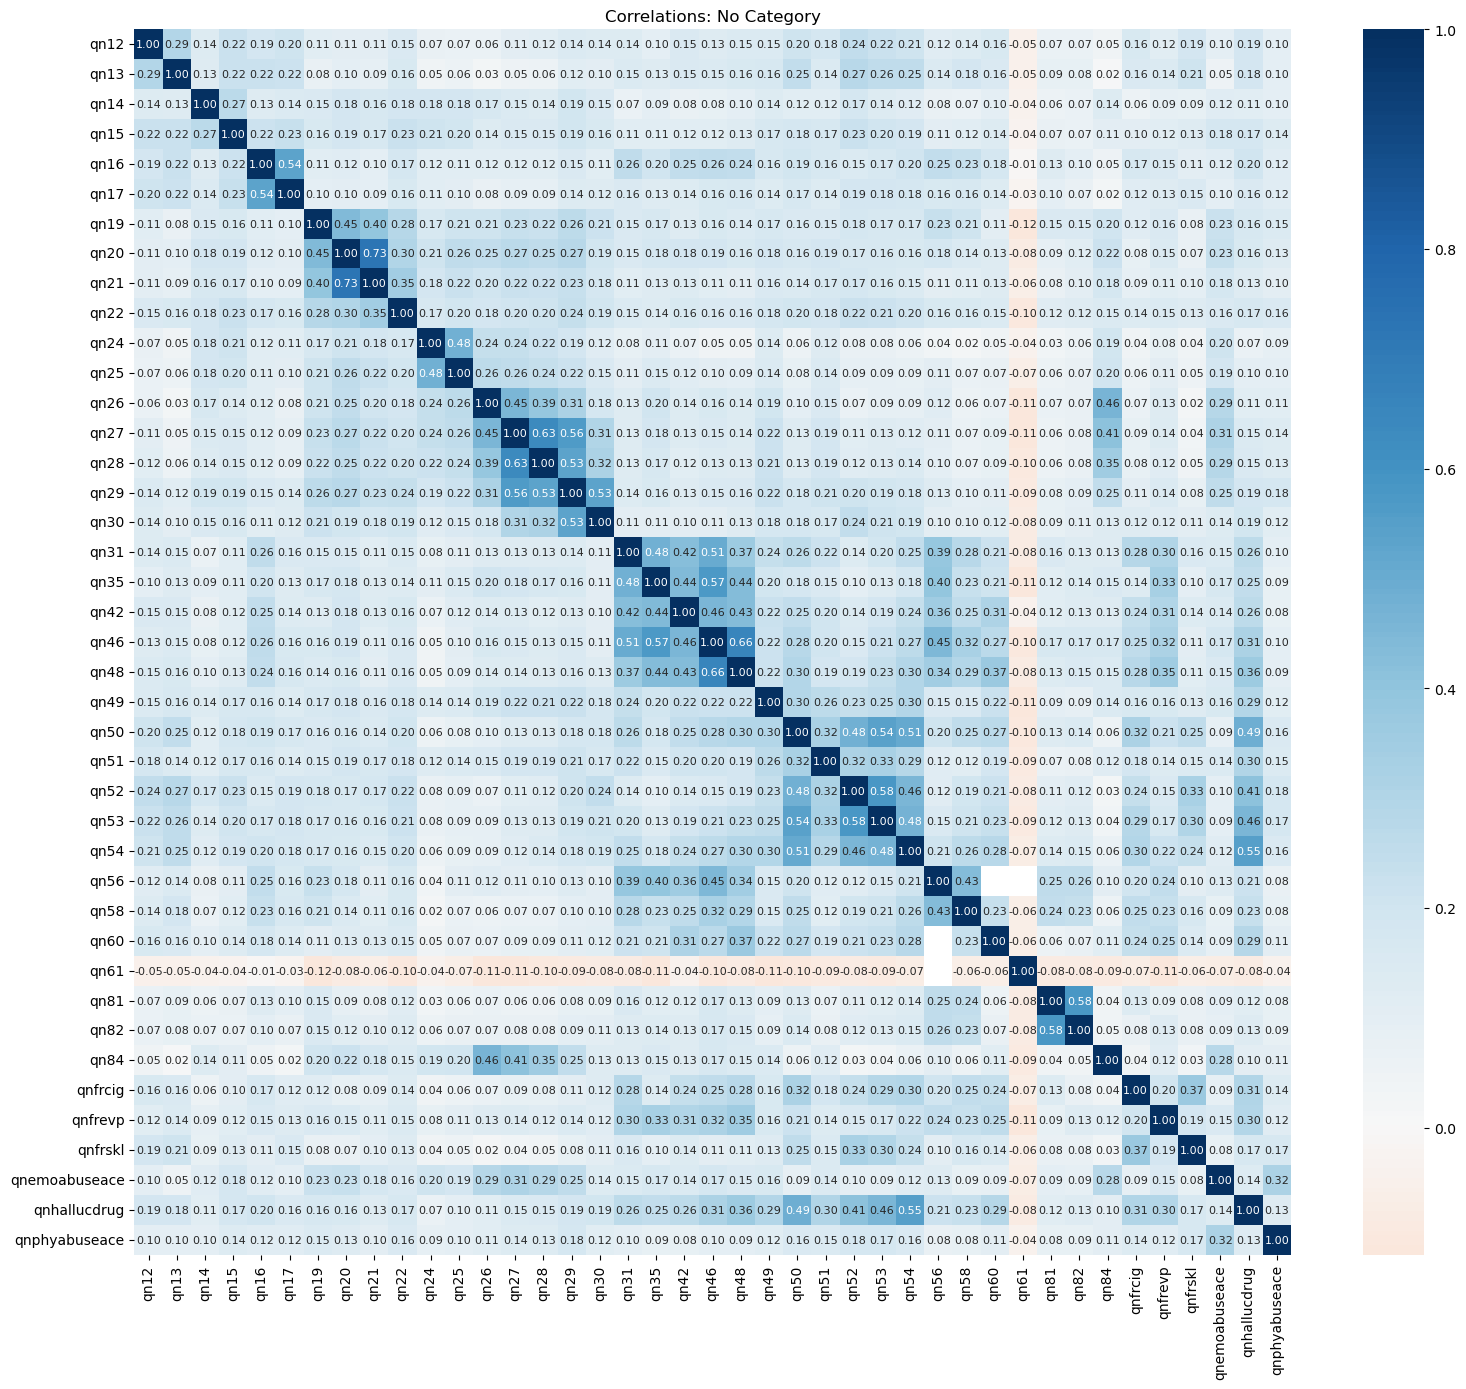

In [196]:
# unweighted person correlation heatmap for all dichotomous variables
plt.figure(figsize=(16,14))
yrbss_hm_corr = yrbss_hm.corr(method='pearson')
sns.heatmap(yrbss_hm_corr, annot=True, fmt='.2f',cmap='RdBu', center=0, annot_kws={'size':8})
plt.title("Correlations: No Category")
plt.tight_layout()
plt.show()

In [1]:
# weighted phi correlation coefficient function for dichotomous variables
def weighted_phi(x, y, w):                                                                                            # defining function and its variables
    mask = (~pd.isna(x)) & (~pd.isna(y)) & (~pd.isna(w))                                                              
    x, y, w = x[mask], y[mask], w[mask]                                                                               # keep rows where all 3 columns have a value for variables of interest
    mean_x = np.average(x, weights=w)                                                                                 # weighted average of x variable
    mean_y = np.average(y, weights=w)                                                                                 # weighted average of y variable
    cov_xy = np.average((x - mean_x)*(y - mean_y), weights=w)                                                         # covariance of x and y
    var_x = np.average((x - mean_x)**2, weights=w)                                                                    # variance of x variable
    var_y = np.average((y - mean_y)**2, weights=w)                                                                    # variance of y variable
    return cov_xy / np.sqrt(var_x*var_y) if var_x > 0 and var_y > 0 else np.nan                                       # phi coefficient, definitionally the pearson correlation for 2 binary variables

In [208]:
# displaying values to test weighted phi correlation coefficient function, manually calculated at 0.5444941986
contingency_table = pd.crosstab(yrbss_df['qn53'], yrbss_df['qn50'])
print(contingency_table) 

qn50     0.0   1.0
qn53              
0.0   146086  5282
1.0     1548  4128


In [209]:
# testing unweighted phi correlation coefficient function
def test_phi(x, y):                                                                                                   # same function as above, excludes weights
    mask = (~pd.isna(x)) & (~pd.isna(y))
    x, y = x[mask], y[mask]
    mean_x = np.average(x)
    mean_y = np.average(y)
    cov_xy = np.average((x - mean_x)*(y - mean_y))
    var_x = np.average((x - mean_x)**2)
    var_y = np.average((y - mean_y)**2)
    return cov_xy / np.sqrt(var_x*var_y) if var_x > 0 and var_y > 0 else np.nan
test = test_phi(yrbss_df['qn50'], yrbss_df['qn53'])

if test.round(6) == 0.544494:                                                                                         # rounded due to memory limit of calculator used for manual calculation
    print("Function valid")
else:
    print("Function invalid")
print(test)

Function valid
0.5444941987803982


In [206]:
# setting up DataFrame for weighted phi coefficient heatmap
exclude = ['year', 'weight','stratum','PSU','record','sex','race7','sexid2']                                          # columns to exclude in DataFrame
var_int = []                                                                                                          # empty list to store variables of interest
for c in yrbss_df.columns:                                                                                            # loop through every column name in yrbss_df
    if c not in exclude:                                                                                              # skip columns in exclude 
        vals = yrbss_df[c].dropna().unique()                                                                          # drop missing values, grab unique values
        try:
            vals = [int(v) for v in vals]                                                                             # convert unique values to integers if applicable
        except Exception:
            continue                                                                                                  # skips column upon failure to convert unique values to integers
        if set(vals).issubset({0,1}):
            var_int.append(c)                                                                                         # if column contains these values, add column to list

phi_matrix = pd.DataFrame(index=var_int, columns=var_int, dtype=float)                                                # create empty square DataFrame, rows and columns are variables of interest

for i in var_int:
    for j in var_int:                                                                                                 # iterate over every pair of variables
        if i == j:
            phi_matrix.loc[i,j] = 1.0                                                                                 # correlation set to 1 if variable compared to itself
        else:
            phi_matrix.loc[i,j] = weighted_phi(yrbss_df[i].values, yrbss_df[j].values, yrbss_df['weight'].values)     # compute weighted_phi and store in appropriate cell of phi_matrix

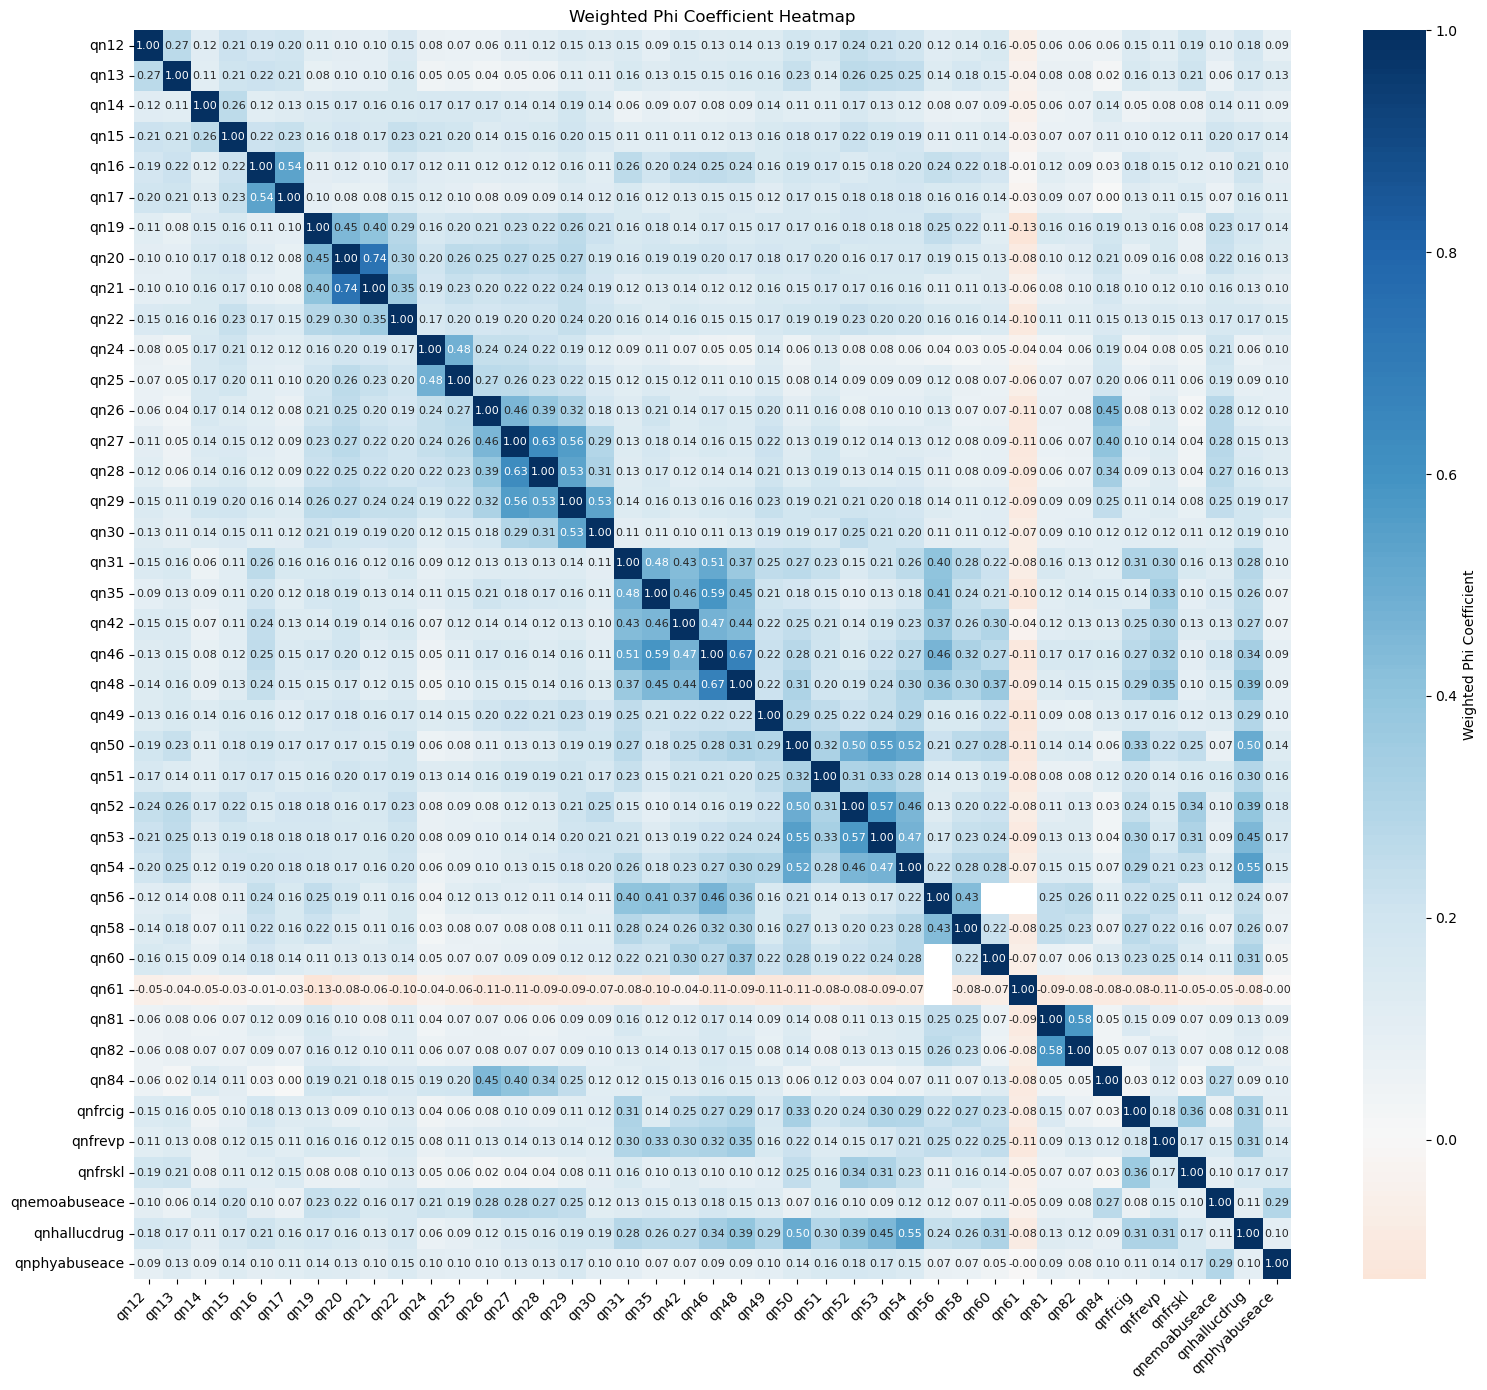

In [207]:
# weighted phi correlation heatmap for all dichotomous variables
plt.figure(figsize=(16,14))
sns.heatmap(phi_matrix.astype(float), annot=True, fmt='.2f', cmap='RdBu', center=0, cbar_kws={'label':'Weighted Phi Coefficient'}, annot_kws={'size':8})
plt.title('Weighted Phi Coefficient Heatmap')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


|x|x description|y|y description|phi|exclude(E) or include(I)|Exclusion Reason|
|:--|:--|:--|:--|:--:|:--:|:--|
|qn17|Physical Fight at School|qn16|Physical Fight|0.54|E|Physical Fight at School cannot occur without Physical Fight|
|qn20|Forced Intimacy|qn19|Forced Sex|0.45|E|Forced Sex cannot occur without Forced Intimacy|
|qn21|Forced Dating Intimacy|qn19|Forced Sex|0.40|E|Forced Sex cannot occur without Forced Dating Intimacy|
|qn21|Forced Dating Intimacy|qn20|Forced Intimacy|0.74|E|Forced Dating Intimacy cannot occur without Forced Intimacy|
|qn25|Electronically Bullied|qn24|Bullied at School|0.48|I|
|qn27|Considered Suicide|qn26|Felt Sad or Hopeless|0.46|E|Felt Sad or Hopeless not a risk that can be chosen to partake in|
|qn28|Made a Suicide Plan|qn27|Considered Suicide|0.63|E|Made a Suicide Plan ccannot occur without Considered Suicide|
|qn29|Attempted Suicide|qn27|Considered Suicide|0.56|I|
|qn29|Attempted Suicide|qn28|Made a Suicide Plan|0.53|I|
|qn30|Injurious Suicide Attempt|qn29|Attempted Suicide|0.53|E|Complexities beyond the scope of analysis|
|qn35|Tried Vaping|qn31|Tried Cigarettes|0.48|I|
|qn42|Frequent Alcohol Use|qn31|Tried Cigarettes|0.43|I|
|qn42|Frequent Alcohol Use|qn35|Tried Vaping|0.46|I|
|qn46|Tried Marijuana|qn31|Tried Cigarettes|0.51|I|
|qn46|Tried Marijuana|qn35|Tried Vaping|0.59|I|
|qn46|Tried Marijuana|qn42|Frequent Alcohol Use|0.47|I|
|qn48|Frequent Marijuana Use|qn35|Tried Vaping|0.45|I|
|qn48|Frequent Marijuana use|qn42|Frequent Alcohol Use|0.44|I|
|qn48|Frequent Marijuana use|qn46|Tried Marijuana|0.67|E|Frequent Mariuana Use cannot occur without Tried Marijuana|
|qn52|Tried Heroin|qn50|Tried Cocaine|0.50|I|
|qn53|Tried Methamphetamine|qn50|Tried Cocaine|0.55|I|
|qn53|Tried Methamphetamine|qn52|Tried Heroin|0.57|I|
|qn54|Tried Ecstasy|qn50|Tried Cocaine|0.52|I|
|qn54|Tried Ecstasy|qn52|Tried Heroin|0.46|I|
|qn54|Tried Ecstasy|qn53|Tried Methamphetamine|0.47|I|
|qn56|Have Had Sex|qn31|Tried Cigarettes|0.40|I|
|qn56|Have Had Sex|qn35|Tried Vaping|0.41|I|
|qn56|Have Had Sex|qn46|Tried Marijuana|0.46|I|
|qn58|Sex with >=4 Partners|qn56|Have Had Sex|0.43|E|Sex with >=4 Partners cannot occur without Have Had Sex|
|qn82|Had an STD Test|qn81|Had an HIV Test|0.58|E|Had an HIV test cannot occur without Had an STD Test|
|qn84|Current Mental Health|qn26|Felt Sad or Hopeless|0.45|E|Felt Sad or Hopeless not a risk that can be chosen to partake in|
|qn84|Current Mental Health|qn27|Considered Suicide|0.40|E|Complexities beyond the scope of analysis|
|qnhallucdrug|Tried Hallucinogens|qn50|Tried Cocaine|0.50|I|
|qnhallucdrug|Tried Hallucinogens|qn53|Tried Methamphetamine|0.45|I|
|qnhallucdrug|Tried Hallucinogens|qn54|Tried Ecstasy|0.55|I|

In [ ]:
pairs_of_interest = [("qn25","qn24"), 
                     ("qn29","qn27"), 
                     ("qn29","qn28"), 
                     ("qn35","qn31"), 
                     ("qn42","qn31"), 
                     ("qn42","qn35"), 
                     ("qn46","qn31"), 
                     ("qn46","qn35"), 
                     ("qn46","qn42"),
                     ("qn48","qn35"),
                     ("qn48","qn42"),
                     ("qn52","qn50"),
                     ("qn53","qn50"),
                     ("qn53","qn52"),
                     ("qn54","qn50"),
                     ("qn54","qn52"),
                     ("qn54","qn53"),
                     ("qn56","qn31"),
                     ("qn56","qn35"),
                     ("qn56","qn46"),
                     ("qnhallucdrug", "qn50"),
                     ("qnhallucdrug","qn53"),
                     ("qnhallucdrug","qn54")
                    ]

In [2]:
def cpro(df, x, y, w):                                                                                                # defining function and its variables
    mask = (~pd.isna(df[x])) & (~pd.isna(df[y])) & (~pd.isna(df[w]))                     
    df = df.loc[mask]                                                                                                 # keep rows where all 3 columns have a  for variables of interest
    w_x1y0 = sum(df[w]*((df[x] == 1) & (df[y] == 0)))                                                                 # weighted sum of yes for x and no for y 
    w_y1x0 = sum(df[w]*((df[y] == 1) & (df[x] == 0)))                                                                 # weighted sum of yes for y and no for x
    w_xy1 = sum(df[w]*(((df[x] == 1) & (df[y] == 1))))                                                                # weighted sum of yes for both 
    w_xy0 = sum(df[w]*(((df[x] == 0) & (df[y] == 0))))                                                                # weighted sum of no for both
    p_y_given_x = w_xy1/(w_x1y0 + w_xy1)                                                                              # conditional probability for y given that x is yes
    p_x_given_y = w_xy1/(w_y1x0 + w_xy1)                                                                              # conditional probability for x given that y is yes
    rr_y_given_x = (w_xy1/(w_xy1 + w_x1y0))/(w_y1x0/(w_y1x0 + w_xy0))                                                 # risk ratio for y given that x is yes
    rr_x_given_y = (w_xy1/(w_xy1 + w_y1x0))/(w_x1y0/(w_x1y0 + w_xy0))                                                 # risk ratio for x given that y is yes
    odds_ratio = (w_xy1*w_xy0)/(w_x1y0*w_y1x0)               
    return {
        "x": x,
        "y": y,
        "P(y|x)": p_y_given_x,
        "P(x|y)": p_x_given_y,
        "RR(y|x)": rr_y_given_x,
        "RR(x|y)": rr_x_given_y,
        "OR": odds_ratio,
        "xy0": w_xy0,
        "x1y0": w_x1y0,
        "y1x0": w_y1x0,
        "xy1": w_xy1
    }                                                                                                                 # output containing all relevant values

In [181]:
results = [cpro(yrbss_df, x, y, 'weight') for x, y, in pairs_of_interest]
summary_df = pd.DataFrame(results)
summary_df = summary_df.round(4)
print(summary_df)

               x     y  P(y|x)  P(x|y)  RR(y|x)  RR(x|y)        OR  \
0           qn25  qn24  0.6254  0.5170   5.7924   7.1787   13.7924   
1           qn29  qn27  0.8818  0.4167   7.9709  35.4024   59.9760   
2           qn29  qn28  0.7666  0.4408   8.8951  19.9133   34.8219   
3           qn35  qn31  0.4750  0.8381   7.5360   3.0159   13.4497   
4           qn42  qn31  0.6445  0.6214   3.0631   3.1971    6.8040   
5           qn42  qn35  0.7602  0.5186   2.9565   4.9275    9.1583   
6           qn46  qn31  0.6980  0.6867   3.8079   3.9126   10.2966   
7           qn46  qn35  0.8169  0.6682   4.0324   6.4954   17.5641   
8           qn46  qn42  0.6483  0.6642   3.5825   3.4656    8.3419   
9           qn48  qn35  0.8595  0.4010   2.8868   9.0465   14.4338   
10          qn48  qn42  0.7622  0.4387   3.1820   6.1495   10.1748   
11          qn52  qn50  0.8380  0.3122  21.8412  89.4757  129.6412   
12          qn53  qn50  0.7084  0.4608  23.0714  41.8100   76.6919   
13          qn53  qn

In [184]:
summary_df.to_csv("Heatmap_stats.csv", index=False)